In [ ]:
!pip install scikit-learn seaborn matplotlib pandas numpy --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = '/content/drive/MyDrive/traffic_project/'
file_path = project_path + 'integrated_dataset.csv'

# Load the integrated dataset
df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully:", df.shape)
df.head()

✅ Dataset loaded successfully: (80151, 17)


,ID,Severity,Start_Time,City,State,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,highway,lanes,maxspeed,length,distance_to_road
0,A-23219,2,2016-10-05 11:20:14,Sonoma,CA,66.2,46.0,10.0,5.8,0.069118,Clear,Day,primary,1.0,35.0,21.287442,1.673416e+01
1,A-20732,2,2016-09-17 21:30:42,Los Gatos,CA,66.9,66.0,10.0,NaN,0.040625,Partly Cloudy,Night,trunk,2.0,50.0,2488.211158,2.054747e+00
2,A-39556,2,2016-05-22 07:37:28,Byron,CA,55.0,74.0,10.0,4.6,0.050286,Overcast,Day,tertiary,1.0,35.0,359.629750,5.277224e-02
3,A-147513,2,2016-12-17 10:48:42,Augusta,GA,48.9,59.0,10.0,3.5,0.038388,Clear,Day,track,1.0,35.0,10091.770357,3.745447e+06
4,A-314225,2,2017-01-27 07:20:14,San Jose,CA,37.9,89.0,10.0,NaN,0.087291,Mostly Cloudy,Day,motorway,5.0,65.0,100.147407,6.681468e+00


In [ ]:
# Drop rows with missing Severity (target)
df = df.dropna(subset=['Severity'])

# Fill numeric missing values with median
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical features
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

print("✅ Data cleaned and encoded")

✅ Data cleaned and encoded


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Severity'])
y = df['Severity']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train/Test Split complete")
print("Train size:", X_train.shape, "| Test size:", X_test.shape)

✅ Train/Test Split complete
Train size: (64120, 16) | Test size: (16031, 16)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("🚀 Training Support Vector Machine (SVM)...")
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)
print("✅ SVM model training complete")

🚀 Training Support Vector Machine (SVM)...
✅ SVM model training complete


In [ ]:
# Predictions
y_pred = svm_clf.predict(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n🎯 Model Accuracy:", round(acc*100, 2), "%")
print("\n📊 Classification Report:\n", report)


🎯 Model Accuracy: 65.9 %

📊 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.67      0.89      0.77     10140
           3       0.58      0.26      0.36      5870
           4       0.00      0.00      0.00         9

    accuracy                           0.66     16031
   macro avg       0.31      0.29      0.28     16031
weighted avg       0.64      0.66      0.62     16031



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


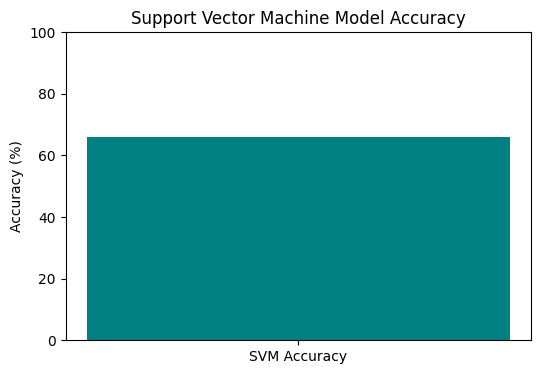

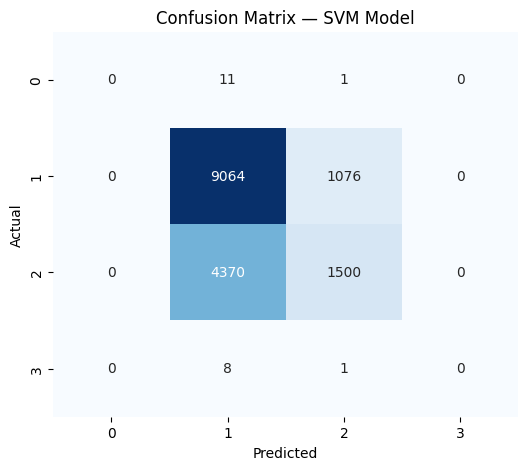

In [ ]:
# Accuracy bar chart
plt.figure(figsize=(6,4))
plt.bar(['SVM Accuracy'], [acc*100], color='teal')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.title('Support Vector Machine Model Accuracy')
plt.show()

# Confusion matrix heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix — SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Compare a sample of predictions
sample_results = pd.DataFrame({'Actual': y_test[:20].values, 'Predicted': y_pred[:20]})
print("🔍 Sample predictions:\n", sample_results)

🔍 Sample predictions:
     Actual  Predicted
0        2          2
1        3          3
2        3          2
3        2          2
4        2          2
5        2          2
6        3          3
7        3          2
8        2          2
9        2          2
10       3          2
11       2          2
12       3          2
13       2          3
14       2          2
15       3          2
16       3          2
17       2          2
18       2          2
19       2          2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np
import pandas as pd

# Separate features (X) and target (y)
# Assuming 'Severity' is the target variable
# Use 'df' instead of 'integrated_dataset' as df is the variable holding the loaded data
X = df.drop('Severity', axis=1)
y = df['Severity']

# Drop the 'ID' column as it is an identifier and not a feature
if 'ID' in X.columns:
    X = X.drop('ID', axis=1)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Check if 'Start_Time' is in the list before removing it
if 'Start_Time' in categorical_features:
    categorical_features.remove('Start_Time')

numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Handle 'Start_Time' by extracting numerical features
# Ensure 'Start_Time' column exists and is of object type before processing
if 'Start_Time' in X.columns and X['Start_Time'].dtype == 'object':
    X['Start_Time'] = pd.to_datetime(X['Start_Time'])
    X['start_hour'] = X['Start_Time'].dt.hour
    X['start_minute'] = X['Start_Time'].dt.minute
    X['start_day_of_week'] = X['Start_Time'].dt.dayofweek
    X['start_month'] = X['Start_Time'].dt.month
    X = X.drop('Start_Time', axis=1) # Drop the original Start_Time column
    # Update numerical features list after extracting features from Start_Time
    numerical_features.extend(['start_hour', 'start_minute', 'start_day_of_week', 'start_month'])
elif 'Start_Time' in X.columns:
    print("Warning: 'Start_Time' column found but not of expected object type. Skipping datetime feature extraction.")
else:
    print("Warning: 'Start_Time' column not found in the DataFrame.")


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with the mean
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Create a column transformer to apply different transformations to different columns
# Ensure that features lists are not empty before creating the ColumnTransformer
transformers_list = []
if numerical_features:
    transformers_list.append(('num', numerical_transformer, numerical_features))
if categorical_features:
    transformers_list.append(('cat', categorical_transformer, categorical_features))

if transformers_list:
    preprocessor = ColumnTransformer(transformers=transformers_list, remainder='passthrough') # Keep other columns if any
else:
    print("Error: No numerical or categorical features identified for preprocessing.")
    # Handle this case, maybe exit or raise an error
    exit()


# Apply the preprocessing pipeline to the data
X_processed = preprocessor.fit_transform(X)

# Split data into training, validation, and test sets
# Ensure y has enough samples for stratification if num_classes > 1
if len(np.unique(y)) > 1:
    X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
else:
    # Handle the case where there's only one class
    print("Warning: Only one class found in the target variable. Skipping stratified split.")
    X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Adjust target variable to be 0-indexed for sparse_categorical_crossentropy
# Only adjust if there are multiple classes
if len(np.unique(y)) > 1:
    y_train = y_train - 1
    y_val = y_val - 1
    y_test = y_test - 1
else:
    print("Warning: Target variable not adjusted to 0-indexed as only one class is present.")


print("Data preparation complete with imputation.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preparation complete with imputation.
Shape of X_train: (56105, 3171)
Shape of X_val: (12023, 3171)
Shape of X_test: (12023, 3171)
Shape of y_train: (56105,)
Shape of y_val: (12023,)
Shape of y_test: (12023,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Determine the input shape based on the number of features in the training data
input_shape = (X_train.shape[1],)

# Determine the number of output units based on the number of unique severity levels
# Assuming y_train contains the target variable
num_classes = len(y_train.unique())

# Define the feed-forward neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=input_shape), # Increased neurons
    Dense(128, activation='relu'), # Added layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'), # Added layer
    Dense(num_classes, activation='softmax') # Output layer for classification
])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       812,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,396 (3.26 MB)

 Trainable params: 855,396 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
import numpy as np # Import numpy

# Convert sparse matrix X_train to a dense array for description
# Adding a check in case X_train is not sparse
if isinstance(X_train, np.ndarray):
    X_train_dense = X_train
else: # Assume it's a sparse matrix if not a dense array
    X_train_dense = X_train.toarray()


# Display descriptive statistics of the preprocessed training features
print("Descriptive statistics for X_train:")
display(pd.DataFrame(X_train_dense).describe())

# Display the distribution of the target variable
# y_train should be a dense pandas Series
print("\nValue counts for y_train:")
display(y_train.value_counts())

Descriptive statistics for X_train:


,0,1,2,3,4,5,6,7,8,9,...,3161,3162,3163,3164,3165,3166,3167,3168,3169,3170
count,56105.000000,56105.000000,56105.000000,5.610500e+04,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,...,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000,56105.000000
mean,-0.005604,0.002542,-0.002262,4.472139e-03,-0.002965,-0.001906,-0.002390,-0.003664,0.004543,-0.000748,...,0.024757,0.012174,0.000089,0.003832,0.010106,0.623866,0.003012,0.000499,0.002602,0.246270
std,1.000965,0.999476,1.006097,1.004126e+00,0.914887,0.996599,0.993636,0.999052,0.999953,0.999992,...,0.155386,0.109661,0.009440,0.061786,0.100020,0.484419,0.054801,0.022334,0.050946,0.430842
min,-3.643860,-2.876079,-4.334472,-2.179765e+00,-0.321019,-0.232553,-5.559419,-0.570407,-1.241836,-2.442435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.573317,-0.709210,0.382385,-7.369987e-01,-0.194251,-0.232553,-0.199059,-0.504993,-1.146168,-0.725083,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.080113,0.044483,0.382385,4.418737e-16,-0.027279,-0.232553,-0.199059,-0.504993,0.059970,0.038184,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.745108,0.798176,0.382385,4.072640e-01,0.143453,-0.232553,-0.199059,-0.504993,0.910262,0.801452,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.254358,1.646081,5.099242,5.556446e+00,62.999488,11.039610,7.662802,4.001921,1.557327,1.946353,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Value counts for y_train:


,count
Severity,
1,35487
2,20543
0,44
3,31


In [ ]:
!pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
display(y_train_resampled.value_counts())

# Update X_train and y_train to the resampled data for training
X_train = X_train_resampled
y_train = y_train_resampled

print("\nTraining data resampled using SMOTE.")
print(f"Shape of X_train after SMOTE: {X_train.shape}")
print(f"Shape of y_train after SMOTE: {y_train.shape}")

Class distribution after SMOTE:


,count
Severity,
1,35487
2,35487
0,35487
3,35487



Training data resampled using SMOTE.
Shape of X_train after SMOTE: (141948, 3171)
Shape of y_train after SMOTE: (141948,)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

print("Model compiled successfully.")

Model compiled successfully.


In [ ]:
# Train the model
# You can adjust the number of epochs and batch_size based on your needs and computational resources
epochs = 10  # Number of times to iterate over the entire training dataset
batch_size = 32 # Number of samples per gradient update

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

print("Model training complete.")

Epoch 1/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.8282 - loss: 0.3671 - val_accuracy: 0.7756 - val_loss: 0.4816
Epoch 2/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9013 - loss: 0.2157 - val_accuracy: 0.7824 - val_loss: 0.4817
Epoch 3/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9099 - loss: 0.1976 - val_accuracy: 0.7819 - val_loss: 0.4816
Epoch 4/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.9184 - loss: 0.1801 - val_accuracy: 0.7780 - val_loss: 0.5122
Epoch 5/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9218 - loss: 0.1688 - val_accuracy: 0.7715 - val_loss: 0.5355
Epoch 6/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9294 - loss: 0.1540 - val_accuracy: 0.7701 - val_loss: 0.5714
Epoch 7/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.9329 - loss: 0.1459 - val_accuracy: 0.7708 - val_loss: 0.6134
Epoch 8/10
4436/4436 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.9378 - loss: 0

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.7867
Test Accuracy: 0.7652


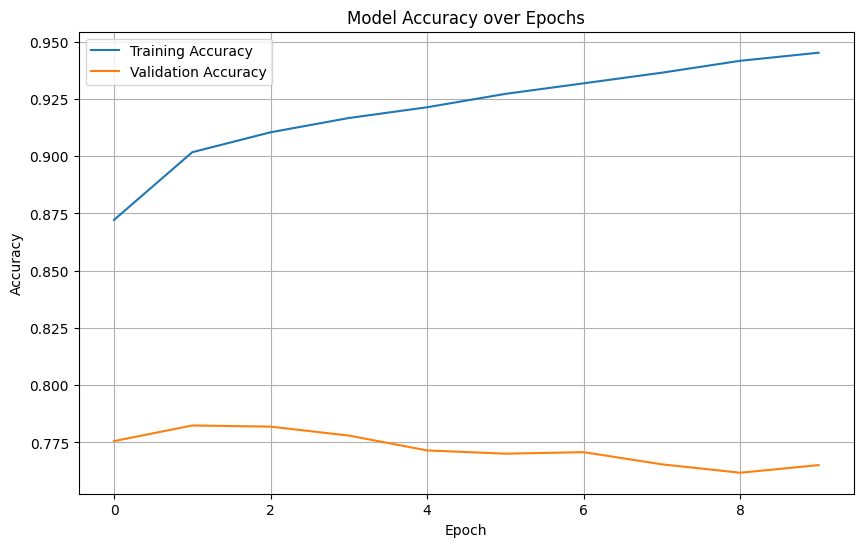

376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


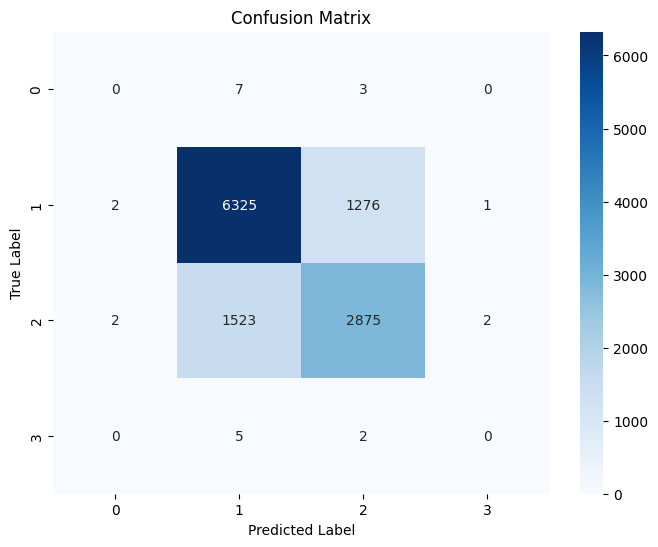

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Generate predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Select a few samples from the test set (e.g., the first 5 samples)
num_samples_to_predict = 5
X_sample = X_test[:num_samples_to_predict]
y_true_sample = y_test[:num_samples_to_predict]

# Make predictions on the sample data
y_pred_probs_sample = model.predict(X_sample)
y_pred_sample = np.argmax(y_pred_probs_sample, axis=1)

print(f"Making predictions on the first {num_samples_to_predict} samples from the test set:")

for i in range(num_samples_to_predict):
    print(f"\nSample {i+1}:")

    print(f"  True Severity (0-indexed): {y_true_sample.iloc[i]}") # Use .iloc for pandas Series
    print(f"  Predicted Severity (0-indexed): {y_pred_sample[i]}")

print("\n(Predicted and True Severities are 0-indexed)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Making predictions on the first 5 samples from the test set:

Sample 1:
  True Severity (0-indexed): 1
  Predicted Severity (0-indexed): 1

Sample 2:
  True Severity (0-indexed): 1
  Predicted Severity (0-indexed): 1

Sample 3:
  True Severity (0-indexed): 1
  Predicted Severity (0-indexed): 1

Sample 4:
  True Severity (0-indexed): 1
  Predicted Severity (0-indexed): 2

Sample 5:
  True Severity (0-indexed): 1
  Predicted Severity (0-indexed): 1

(Predicted and True Severities are 0-indexed)


XGBOOST


In [ ]:
!pip install xgboost scikit-learn seaborn matplotlib pandas numpy --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

In [ ]:


df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully:", df.shape)
df.head()

✅ Dataset loaded successfully: (80151, 17)


,ID,Severity,Start_Time,City,State,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,highway,lanes,maxspeed,length,distance_to_road
0,A-23219,2,2016-10-05 11:20:14,Sonoma,CA,66.2,46.0,10.0,5.8,0.069118,Clear,Day,primary,1.0,35.0,21.287442,1.673416e+01
1,A-20732,2,2016-09-17 21:30:42,Los Gatos,CA,66.9,66.0,10.0,NaN,0.040625,Partly Cloudy,Night,trunk,2.0,50.0,2488.211158,2.054747e+00
2,A-39556,2,2016-05-22 07:37:28,Byron,CA,55.0,74.0,10.0,4.6,0.050286,Overcast,Day,tertiary,1.0,35.0,359.629750,5.277224e-02
3,A-147513,2,2016-12-17 10:48:42,Augusta,GA,48.9,59.0,10.0,3.5,0.038388,Clear,Day,track,1.0,35.0,10091.770357,3.745447e+06
4,A-314225,2,2017-01-27 07:20:14,San Jose,CA,37.9,89.0,10.0,NaN,0.087291,Mostly Cloudy,Day,motorway,5.0,65.0,100.147407,6.681468e+00


In [ ]:
missing_summary = df.isna().sum()
if missing_summary.any():
    df = df.fillna(df.median(numeric_only=True))
else:
    print("✅ No missing values detected.")

✅ No missing values detected.


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
label_enc = LabelEncoder()

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

print("✅ Encoded categorical columns:", list(cat_cols))

✅ Encoded categorical columns: ['ID', 'Start_Time', 'City', 'State', 'Weather_Condition', 'Sunrise_Sunset', 'highway']


In [ ]:
X = df.drop(columns=['Severity'])
y = df['Severity']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete")
print("Training samples:", len(X_train), " | Testing samples:", len(X_test))

✅ Data split complete
Training samples: 64120  | Testing samples: 16031


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✅ Features scaled successfully")

✅ Features scaled successfully


In [ ]:
print("🚀 Training XGBoost model...")

# Adjust labels to be 0-based for XGBoost
y_train_adj = y_train - 1
y_test_adj = y_test - 1

xgb_model = XGBClassifier(
    n_estimators=400,          # number of trees
    learning_rate=0.05,        # smaller step size for better accuracy
    max_depth=6,               # tree depth
    subsample=0.9,             # sample ratio for training
    colsample_bytree=0.9,      # features per tree
    random_state=42,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_scaled, y_train_adj)
print("✅ XGBoost model trained successfully!")

# ---------------------- EVALUATE MODEL ----------------------
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_adj, y_pred)

print(f"\n🎯 Model Accuracy: {accuracy*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test_adj, y_pred))


# ---------------------- EVALUATE MODEL ----------------------
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Model Accuracy: {accuracy*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

🚀 Training XGBoost model...
✅ XGBoost model trained successfully!

🎯 Model Accuracy: 77.82%

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.88      0.83     10140
           2       0.74      0.61      0.67      5870
           3       0.00      0.00      0.00         9

    accuracy                           0.78     16031
   macro avg       0.38      0.37      0.38     16031
weighted avg       0.77      0.78      0.77     16031



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🎯 Model Accuracy: 7.82%

📊 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.50      0.00        12
           2       0.26      0.12      0.17     10140
           3       0.00      0.00      0.00      5870
           4       0.00      0.00      0.00         9

    accuracy                           0.08     16031
   macro avg       0.06      0.16      0.04     16031
weighted avg       0.16      0.08      0.11     16031



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = xgb_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test_adj, y_pred)
cm = confusion_matrix(y_test_adj, y_pred)
report = classification_report(y_test_adj, y_pred)

print("\n🎯 Model Accuracy:", round(acc*100, 2), "%")
print("\n📊 Classification Report:\n", report)


🎯 Model Accuracy: 77.25 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.88      0.83     10140
           2       0.73      0.60      0.66      5870
           3       0.00      0.00      0.00         9

    accuracy                           0.77     16031
   macro avg       0.38      0.37      0.37     16031
weighted avg       0.77      0.77      0.77     16031



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


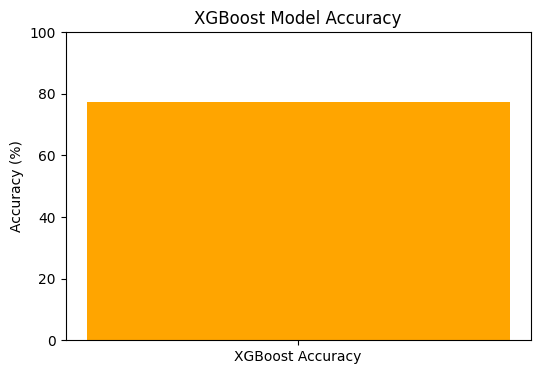

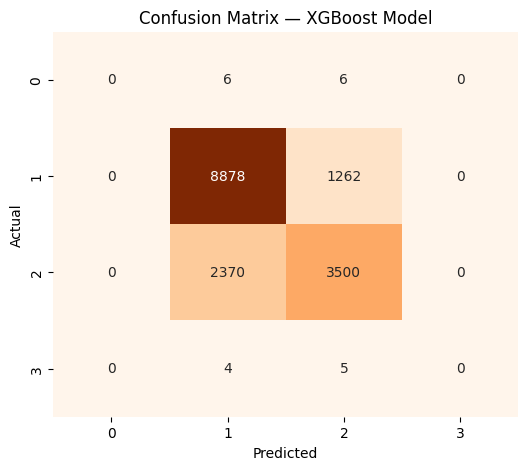

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(['XGBoost Accuracy'], [acc*100], color='orange')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.title('XGBoost Model Accuracy')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix — XGBoost Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-800949166.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='autumn')


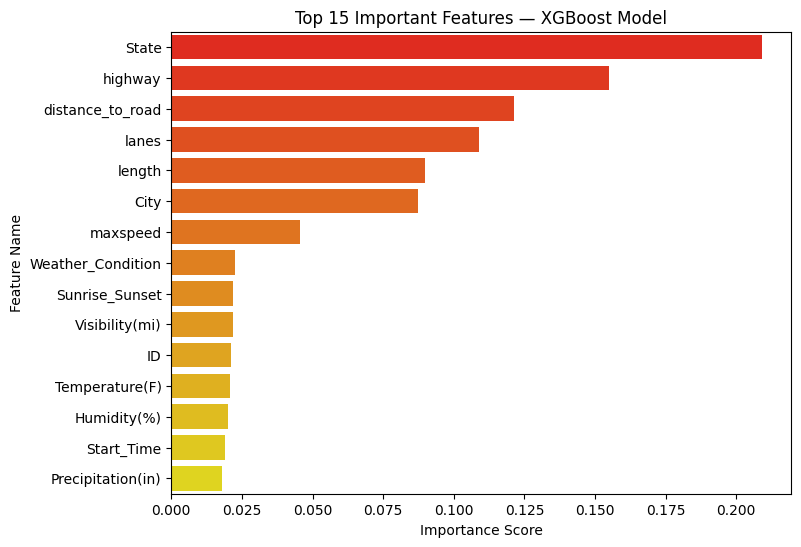

In [ ]:
importances = xgb_model.feature_importances_
feature_names = X.columns

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df, palette='autumn')
plt.title("Top 15 Important Features — XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from datetime import timedelta
from google.colab import files


print("📥 Loading data for CONGESTION prediction...")



df.head()
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df = df.sort_values('Start_Time').reset_index(drop=True)


print("🎯 Defining congestion target...")

def create_congestion_target(df, time_window_minutes=60, location_radius_km=5):
    """
    Create congestion target: Multiple accidents in same area within time window
    """
    df_sorted = df.sort_values('Start_Time').copy()

    congestion_flags = []

    for idx, current_accident in df_sorted.iterrows():
        current_time = current_accident['Start_Time']
        current_city = current_accident['City']

        # Find recent accidents in same city within time window
        time_mask = (df_sorted['Start_Time'] < current_time) & \
                   (df_sorted['Start_Time'] >= current_time - timedelta(minutes=time_window_minutes))
        location_mask = (df_sorted['City'] == current_city)

        recent_accidents = df_sorted[time_mask & location_mask]

        # Congestion = 3+ accidents in same city within time window
        is_congestion = 1 if len(recent_accidents) >= 3 else 0

        congestion_flags.append(is_congestion)

        if idx % 1000 == 0:
            print(f"Processed {idx}/{len(df_sorted)} accidents...")

    return congestion_flags


df['Congestion_Target'] = create_congestion_target(df, time_window_minutes=120, location_radius_km=10)

print(f"🎯 Congestion distribution: {Counter(df['Congestion_Target'])}")
print(f"📊 Congestion rate: {df['Congestion_Target'].mean():.3f}")


# --- III. Feature Engineering for Congestion Prediction ---
print("🔧 Engineering features for congestion prediction...")

# Time-based features
df['hour'] = df['Start_Time'].dt.hour
df['day_of_week'] = df['Start_Time'].dt.dayofweek
df['month'] = df['Start_Time'].dt.month
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['is_rush_hour'] = ((df['hour'] >= 7) & (df['hour'] <= 9)) | ((df['hour'] >= 16) & (df['hour'] <= 18))

# Weather severity features
df['precipitation_heavy'] = (df['Precipitation(in)'] > 0.1).astype(int)
df['low_visibility'] = (df['Visibility(mi)'] < 2).astype(int)
df['high_wind'] = (df['Wind_Speed(mph)'] > 15).astype(int)

# --- ADD THIS SECTION FOR HIGH CARDINALITY FEATURES ---
print(" Handling high cardinality weather and highway features...")

# Weather Condition - group rare types
weather_counts = df['Weather_Condition'].value_counts()
top_weather = weather_counts.head(15).index  # Keep top 15 weather types
df['Weather_Grouped'] = np.where(df['Weather_Condition'].isin(top_weather),
                                df['Weather_Condition'], 'Other_Weather')

# Highway - use your existing mapping but ensure it's comprehensive
highway_mapping = {
    'motorway': 'highway_major',
    'motorway_link': 'highway_major',
    'trunk': 'highway_major',
    'trunk_link': 'highway_major',
    'primary': 'highway_major',
    'primary_link': 'highway_major',
    'secondary': 'highway_minor',
    'secondary_link': 'highway_minor',
    'tertiary': 'highway_minor',
    'tertiary_link': 'highway_minor',
    'track': 'highway_other',
    'service': 'highway_other',
    'residential': 'highway_minor',
    'unclassified': 'highway_other',
    'living_street': 'highway_other'
}
# Map with fallback for unknown types
df['highway_type'] = df['highway'].map(highway_mapping)
df['highway_type'] = df['highway_type'].fillna('highway_other')

print(f"✅ Weather types reduced: {df['Weather_Grouped'].nunique()} from {df['Weather_Condition'].nunique()}")
print(f"✅ Highway types: {df['highway_type'].nunique()} from {df['highway'].nunique()}")

# --- IV. Create True Temporal Sequences for Congestion ---
def create_congestion_sequences(df, sequence_length=6, time_window_hours=4):
    """
    Create sequences of accidents leading up to potential congestion
    Returns a list of DataFrames (sequences) and a list of targets.
    """
    print(" Creating congestion sequences...")

    sequences = []
    targets = []
    sequence_info = []

    df_sorted = df.sort_values('Start_Time').reset_index(drop=True)

    # Define feature columns - INCLUDING WEATHER AND HIGHWAY and CITY
    global feature_columns # Make feature_columns global
    feature_columns = [
        'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)', 'hour', 'day_of_week', 'is_weekend', 'is_rush_hour',
        'precipitation_heavy', 'low_visibility', 'high_wind', 'lanes', 'maxspeed',
        'Weather_Grouped', 'highway_type', 'City'
    ]

    i = 0
    sequences_created = 0

    while i < len(df_sorted) - sequence_length:
        current_city = df_sorted.iloc[i]['City']
        current_time = df_sorted.iloc[i]['Start_Time']

        # Find sequence in same city within time window
        sequence_indices = [i]

        for j in range(i+1, len(df_sorted)):
            if len(sequence_indices) >= sequence_length:
                break

            candidate_city = df_sorted.iloc[j]['City']
            candidate_time = df_sorted.iloc[j]['Start_Time']

            time_gap = (candidate_time - current_time).total_seconds() / 3600

            # Same city, within time window
            if candidate_city == current_city and time_gap <= time_window_hours:
                sequence_indices.append(j)
            elif time_gap > time_window_hours:
                break


        if len(sequence_indices) == sequence_length:
            sequence_data = df_sorted.iloc[sequence_indices][feature_columns + ['Congestion_Target']]


            sequences.append(sequence_data[feature_columns])


            congestion_target = sequence_data.iloc[-1]['Congestion_Target']
            targets.append(congestion_target)

            sequence_info.append({
                'city': current_city,
                'start_time': df_sorted.iloc[sequence_indices[0]]['Start_Time'],
                'end_time': df_sorted.iloc[sequence_indices[-1]]['Start_Time'],
                'time_span_hours': (df_sorted.iloc[sequence_indices[-1]]['Start_Time'] -
                                  df_sorted.iloc[sequence_indices[0]]['Start_Time']).total_seconds() / 3600,
                'has_congestion': congestion_target
            })

            sequences_created += 1
            i = sequence_indices[-1] + 1
        else:
            i += 1

        if sequences_created % 100 == 0:
            print(f"Created {sequences_created} sequences...")

    print(f"✅ Created {len(sequences)} congestion sequences")
    print(f"📊 Congestion sequences: {sum(targets)}/{len(targets)} ({sum(targets)/len(targets)*100:.1f}%)")

    return sequences, np.array(targets), sequence_info

X_sequences_list, y_targets, seq_info = create_congestion_sequences(df, sequence_length=6, time_window_hours=4)


X_sequences_df = pd.concat(X_sequences_list, ignore_index=True)

print(f"Combined sequences DataFrame shape: {X_sequences_df.shape}")

📥 Loading data for CONGESTION prediction...
🎯 Defining congestion target...
Processed 0/80151 accidents...
Processed 1000/80151 accidents...
Processed 2000/80151 accidents...
Processed 3000/80151 accidents...
Processed 4000/80151 accidents...
Processed 5000/80151 accidents...
Processed 6000/80151 accidents...
Processed 7000/80151 accidents...
Processed 8000/80151 accidents...
Processed 9000/80151 accidents...
Processed 10000/80151 accidents...
Processed 11000/80151 accidents...
Processed 12000/80151 accidents...
Processed 13000/80151 accidents...
Processed 14000/80151 accidents...
Processed 15000/80151 accidents...
Processed 16000/80151 accidents...
Processed 17000/80151 accidents...
Processed 18000/80151 accidents...
Processed 19000/80151 accidents...
Processed 20000/80151 accidents...
Processed 21000/80151 accidents...
Processed 22000/80151 accidents...
Processed 23000/80151 accidents...
Processed 24000/80151 accidents...
Processed 25000/80151 accidents...
Processed 26000/80151 accid

In [ ]:

print("🔧 IMPROVED PREPROCESSING WITH ERROR HANDLING...")


print("📊 BEFORE PREPROCESSING:")
print(f"X_sequences_df shape: {X_sequences_df.shape}")


numerical_features = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)',
                     'Precipitation(in)', 'lanes', 'maxspeed']
categorical_features = ['hour', 'day_of_week', 'is_weekend', 'is_rush_hour',
                       'precipitation_heavy', 'low_visibility', 'high_wind',
                       'Weather_Grouped', 'highway_type']

print(f"📋 Numerical features: {numerical_features}")
print(f"📋 Categorical features: {categorical_features}")


preprocessor = ColumnTransformer(
    transformers=[

        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),


        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop' )


print("🔄 Applying preprocessing...")

X_processed = preprocessor.fit_transform(X_sequences_df)


n_samples = len(X_sequences_list)
seq_len = X_sequences_list[0].shape[0]

n_new_features = X_processed.shape[1]
X_preprocessed_sequences = X_processed.reshape(n_samples, seq_len, n_new_features)



print("🔒 Final data cleanup...")
X_preprocessed_sequences = np.nan_to_num(X_preprocessed_sequences, nan=0.0, posinf=1.0, neginf=0.0)


print("✅ AFTER PREPROCESSING:")
print(f"Processed sequences: {X_preprocessed_sequences.shape}")
print(f"Processed range: [{X_preprocessed_sequences.min():.3f}, {X_preprocessed_sequences.max():.3f}]")
print(f"NaN in processed: {np.isnan(X_preprocessed_sequences).any()}")
print(f"Inf in processed: {np.isinf(X_preprocessed_sequences).any()}")

print(f"Features after encoding: {n_new_features}")
print(f"Data quality: ✅ READY FOR TRAINING")

🔧 IMPROVED PREPROCESSING WITH ERROR HANDLING...
📊 BEFORE PREPROCESSING:
X_sequences_df shape: (4188, 17)
📋 Numerical features: ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'lanes', 'maxspeed']
📋 Categorical features: ['hour', 'day_of_week', 'is_weekend', 'is_rush_hour', 'precipitation_heavy', 'low_visibility', 'high_wind', 'Weather_Grouped', 'highway_type']
🔄 Applying preprocessing...
🔒 Final data cleanup...
✅ AFTER PREPROCESSING:
Processed sequences: (698, 6, 65)
Processed range: [-8.560, 22.207]
NaN in processed: False
Inf in processed: False
Features after encoding: 65
Data quality: ✅ READY FOR TRAINING


In [ ]:
# Cell 6: Split data into train and test
print("📊 Splitting data into training and testing sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_sequences, y_targets, test_size=0.2, random_state=42, stratify=y_targets
)


X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


print(f"📊 Training sequences: {X_train.shape}")
print(f"📊 Test sequences: {X_test.shape}")


class_counts = Counter(y_train.flatten())
total_count = sum(class_counts.values())

class_weights = {int(cls): float(total_count / (len(class_counts) * count)) for cls, count in class_counts.items()}


print(f"🎯 Training congestion rate: {class_counts[1.0]/total_count:.3f}")
print(f"🎯 Test congestion rate: {Counter(y_test.flatten())[1.0]/len(y_test):.3f}")
print(f"⚖️ Class weights: {class_weights}")

class_weights_final = class_weights

📊 Splitting data into training and testing sets...
📊 Training sequences: (558, 6, 65)
📊 Test sequences: (140, 6, 65)
🎯 Training congestion rate: 0.742
🎯 Test congestion rate: 0.743
⚖️ Class weights: {1: 0.6739130434782609, 0: 1.9375}


In [ ]:
# Cell 7: Build and compile LSTM model
sequence_length = X_train.shape[1]
n_features = X_train.shape[2]

print(f"🧠 LSTM Input: sequence_length={sequence_length}, n_features={n_features}")

model = Sequential([
    Masking(mask_value=0., input_shape=(sequence_length, n_features)),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    BatchNormalization(),
    LSTM(32, dropout=0.2, recurrent_dropout=0.2),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("📋 Model Summary:")
model.summary()


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-7)
]

🧠 LSTM Input: sequence_length=6, n_features=65


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


📋 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 6, 65)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 6, 64)          │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,625 (182.13 KB)

 Trainable params: 46,433 (181.38 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Cell 8: Train the LSTM model
print("\n🚀 Starting LSTM Training for Congestion Prediction...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weights_final,
    verbose=1
)


🚀 Starting LSTM Training for Congestion Prediction...
Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - accuracy: 0.3719 - loss: 0.8601 - val_accuracy: 0.5786 - val_loss: 0.6848 - learning_rate: 0.0010
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4415 - loss: 0.7933 - val_accuracy: 0.6643 - val_loss: 0.6746 - learning_rate: 0.0010
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4914 - loss: 0.6886 - val_accuracy: 0.7071 - val_loss: 0.6637 - learning_rate: 0.0010
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5486 - loss: 0.6802 - val_accuracy: 0.7071 - val_loss: 0.6579 - learning_rate: 0.0010
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5670 - loss: 0.6976 - val_accuracy: 0.7071 - val_loss: 0.6514 - learning_rate: 0.0010
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5247 - loss: 0.7180 - val_accuracy: 0.7071 - val_loss: 0.6547 - learning_rate: 0.0010
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Cell 9: Evaluate the model
print("\n" + "="*70)
print("📊 CONGESTION PREDICTION - FINAL EVALUATION")
print("="*70)

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, zero_division=0)
test_recall = recall_score(y_test, y_pred, zero_division=0)
test_f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"🎯 Test Accuracy: {test_accuracy:.4f}")
print(f"🎯 Test Precision: {test_precision:.4f}")
print(f"🎯 Test Recall: {test_recall:.4f}")
print(f"🎯 Test F1-Score: {test_f1:.4f}")

print(f"\n📊 Test Set Size: {len(y_test)}")
print(f"📊 Actual Congestion: {sum(y_test)}/{len(y_test)} ({sum(y_test)/len(y_test)*100:.1f}%)")
print(f"📊 Predicted Congestion: {sum(y_pred)}/{len(y_pred)} ({sum(y_pred)/len(y_pred)*100:.1f}%)")

print("\n📈 Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Congestion', 'Congestion']))


📊 CONGESTION PREDICTION - FINAL EVALUATION
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
🎯 Test Accuracy: 0.7071
🎯 Test Precision: 0.7405
🎯 Test Recall: 0.9327
🎯 Test F1-Score: 0.8255

📊 Test Set Size: 140
📊 Actual Congestion: 104.0/140 (74.3%)
📊 Predicted Congestion: 131/140 (93.6%)

📈 Detailed Classification Report:
               precision    recall  f1-score   support

No Congestion       0.22      0.06      0.09        36
   Congestion       0.74      0.93      0.83       104

     accuracy                           0.71       140
    macro avg       0.48      0.49      0.46       140
 weighted avg       0.61      0.71      0.64       140



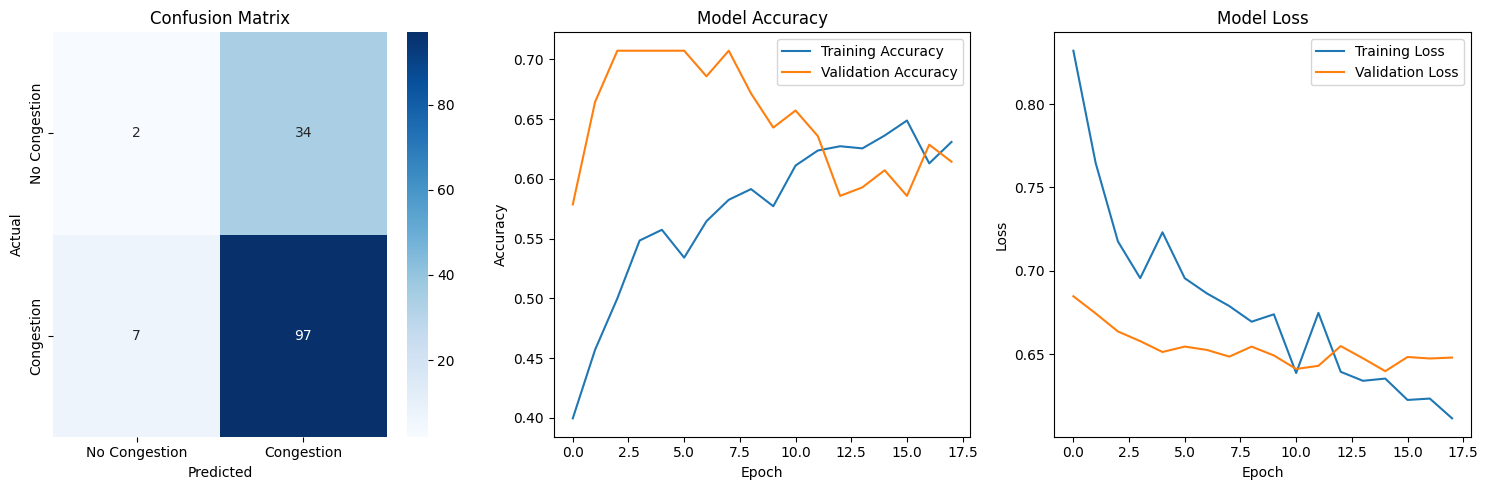


📊 Baseline (Majority Class) Accuracy: 0.7429
📊 LSTM Improvement: -0.0357

✅ CONGESTION PREDICTION WITH LSTM COMPLETE!


In [ ]:
# Cell 10: Plot results
plt.figure(figsize=(15, 5))

# 1. Confusion Matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Congestion', 'Congestion'],
            yticklabels=['No Congestion', 'Congestion'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 2. Accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 3. Loss
plt.subplot(1, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare with baseline
baseline_accuracy = max(Counter(y_test).values()) / len(y_test)
print(f"\n📊 Baseline (Majority Class) Accuracy: {baseline_accuracy:.4f}")
print(f"📊 LSTM Improvement: {test_accuracy - baseline_accuracy:.4f}")

print("\n✅ CONGESTION PREDICTION WITH LSTM COMPLETE!")

In [ ]:

new_raw_input_data = pd.DataFrame({
    'Temperature(F)': [50.0, 51.0, 52.0, 53.0, 54.0, 55.0],
    'Humidity(%)': [80.0, 79.0, 78.0, 77.0, 76.0, 75.0],
    'Visibility(mi)': [10.0, 10.0, 9.0, 9.0, 8.0, 8.0],
    'Wind_Speed(mph)': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'Precipitation(in)': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2],
    'hour': [8, 9, 10, 11, 12, 13],
    'day_of_week': [1, 1, 1, 1, 1, 1], # Monday
    'is_weekend': [0, 0, 0, 0, 0, 0],
    'is_rush_hour': [1, 0, 0, 0, 0, 0], # Assuming rush hour is 7-9 AM
    'precipitation_heavy': [0, 0, 0, 1, 1, 1], # > 0.1 inch
    'low_visibility': [0, 0, 0, 0, 0, 0], # < 2 miles (adjust based on your definition)
    'high_wind': [0, 0, 0, 0, 0, 1], # > 15 mph (adjust based on your definition)
    'lanes': [2, 2, 2, 3, 3, 3],
    'maxspeed': [65, 65, 65, 70, 70, 70],
    'Weather_Grouped': ['Clear', 'Clear', 'Light Rain', 'Light Rain', 'Rain', 'Rain'], # Example weather types
    'highway_type': ['highway_major', 'highway_major', 'highway_major', 'highway_major', 'highway_major', 'highway_major'], # Example highway types
    'City': ['Example City', 'Example City', 'Example City', 'Example City', 'Example City', 'Example City'] # City data
})


feature_columns = [
    'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)',
    'Precipitation(in)', 'hour', 'day_of_week', 'is_weekend', 'is_rush_hour',
    'precipitation_heavy', 'low_visibility', 'high_wind', 'lanes', 'maxspeed',
    'Weather_Grouped', 'highway_type'
]


new_raw_input_data_ordered = new_raw_input_data[feature_columns]


print(" Preprocessing new input data...")
new_processed_data = preprocessor.transform(new_raw_input_data_ordered)


new_input_sequence = new_processed_data.reshape(1, sequence_length, n_new_features)


new_input_sequence = new_input_sequence.astype(np.float32)

print(f" Preprocessed new input shape: {new_input_sequence.shape}")


print(" Making prediction...")
pred = model.predict(new_input_sequence)

print(f"Predicted probability of congestion: {pred[0][0]:.4f}")

if pred > 0.5:
    print("Predicted: High congestion")
else:
    print("Predicted: Low congestion")

 Preprocessing new input data...
 Preprocessed new input shape: (1, 6, 65)
 Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted probability of congestion: 0.5161
Predicted: High congestion


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


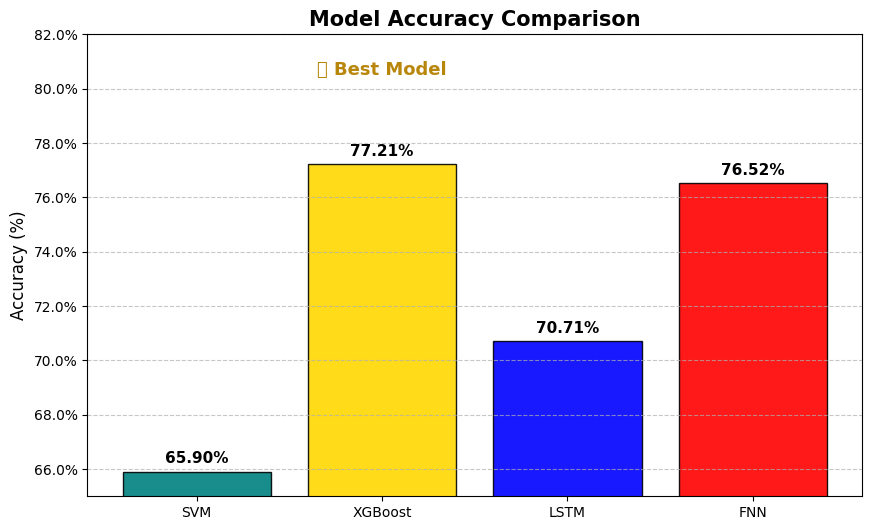

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

models = ['SVM', 'XGBoost', 'LSTM', 'FNN']
accuracies = [0.659, 0.7721, 0.7071, 0.7652]

colors = ['#008080', '#FFD700', '#0000FF', '#FF0000']  # Teal, Gold, Blue, Red

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, edgecolor='black', alpha=0.9)

plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=15, fontweight='bold')
plt.ylim(0.65, 0.82)  # ⬅ raised upper limit slightly so the label fits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add accuracy labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f'{yval*100:.2f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Move “Best Model” label higher (so it doesn’t overlap)
plt.text(1, 0.805, '🏆 Best Model', ha='center', color='darkgoldenrod',
         fontsize=13, fontweight='bold')

plt.show()
